Opening BSCCM-tiny
Opened BSCCM-tiny


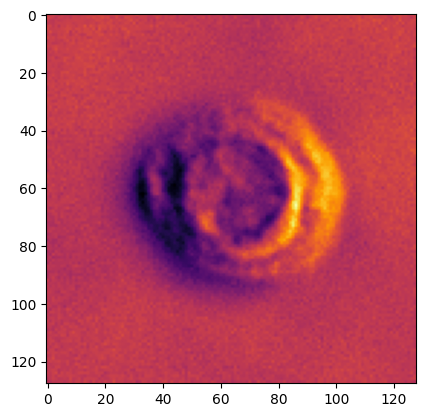

In [1]:
from bsccm import BSCCM
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from tqdm import tqdm


dataset = BSCCM('/Users/henrypinkard/Desktop/BSCCM-tiny')

valid_indices = dataset.get_indices()
an_index = valid_indices[1]
image = dataset.read_image(an_index, channel='DPC_Left')
plt.imshow(image, cmap='inferno')

# Define the channels
channels = ['Brightfield',
            'DF_50',
            'DF_50_Bottom',
            'DF_50_Right',
            'DF_55',
            'DF_60',
            'DF_60_Bottom',
            'DF_60_Right',
            'DF_65',
            'DF_70',
            'DF_70_Bottom',
            'DF_70_Right',
            'DF_75',
            'DF_80',
            'DF_80_Bottom',
            'DF_80_Right',
            'DF_85',
            'DF_90',
            'DPC_Bottom',
            'DPC_Left',
            'DPC_Right',
            'DPC_Top',
            'LED119']

MovieWriter imagemagick unavailable; using Pillow instead.


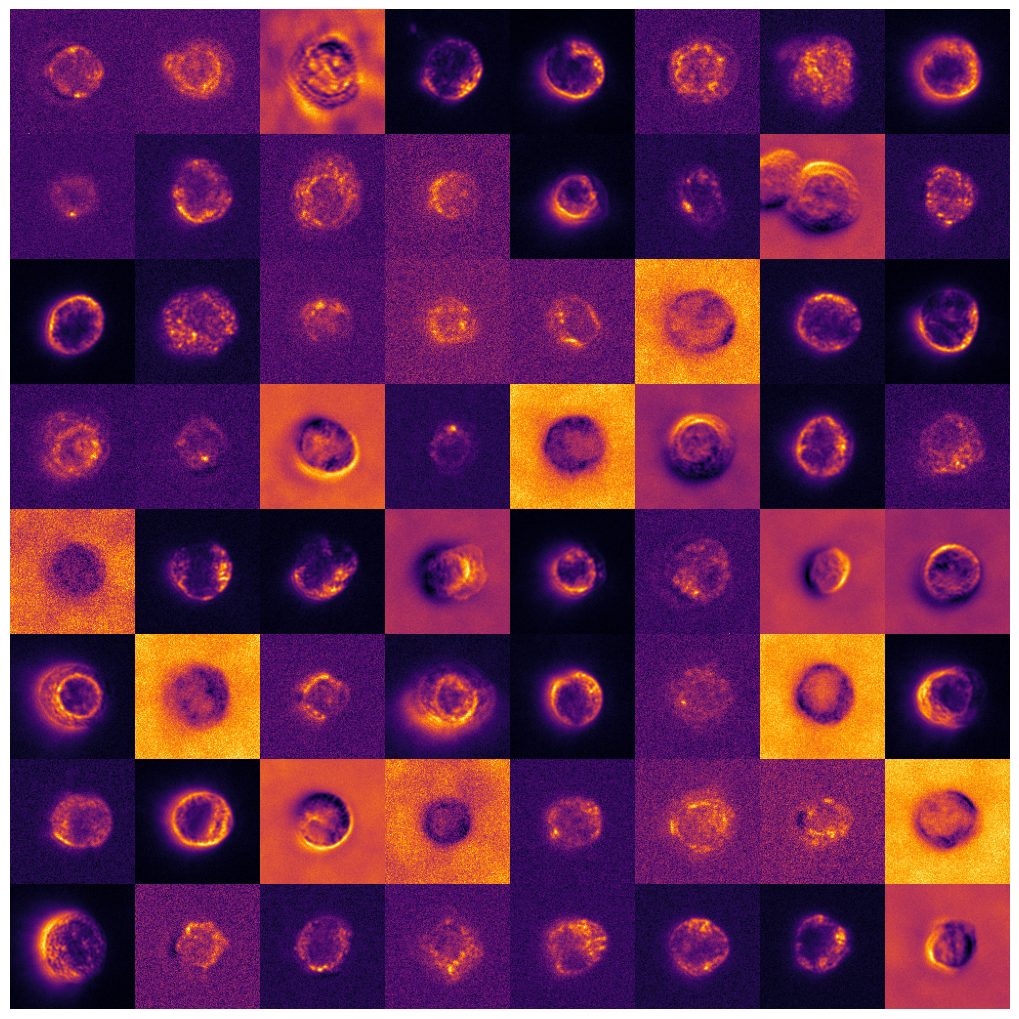

In [25]:

# Select indices for the 8x8 grid
valid_indices = dataset.get_indices()
grid_indices = valid_indices[:64]  # Adjust as needed


# Function to convert an image to RGB using the inferno colormap
def to_rgb(image):
    colormap = cm.inferno
    normed_data = (image - np.min(image)) / (np.max(image) - np.min(image))
    mapped_data = colormap(normed_data)
    return (mapped_data[:, :, :3] * 255).astype(np.uint8)

# Function to create a single frame
def create_frame(frame_num):
    # Initialize a large array to hold the stitched image
    grid_size = 128  # Assuming each cell image is 128x128
    stitched_image = np.zeros((grid_size * 8, grid_size * 8, 3), dtype=np.uint8)

    for i, idx in enumerate(grid_indices):
        # Choose a random channel for each cell
        channel = random.choice(channels)
        image = dataset.read_image(idx, channel=channel)

        # Convert to RGB
        rgb_image = to_rgb(image)

        # Determine position in grid
        row, col = divmod(i, 8)
        stitched_image[row * grid_size:(row + 1) * grid_size, col * grid_size:(col + 1) * grid_size] = rgb_image

    return stitched_image

def update(frame_num):
    frame = create_frame(frame_num)
    plt.imshow(frame)
    plt.axis('off')

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(np.zeros((8 * 128, 8 * 128, 3)), aspect='auto')  # Update the size based on your image dimensions
ax.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)


anim = FuncAnimation(fig, update, frames=20, interval=500)  # 20 frames, 500ms each

# Save the animation
anim.save('cell_montage_animation.gif', writer='imagemagick')


/var/folders/gp/g6n8kd2x39v3w7vlmqs9j82r0000gn/T/ipykernel_62725/470195377.py:48: MatplotlibDeprecationWarning: The save_count attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later.
  with tqdm(total=anim.save_count) as pbar:
100%|██████████| 20/20 [00:05<00:00,  3.56it/s]


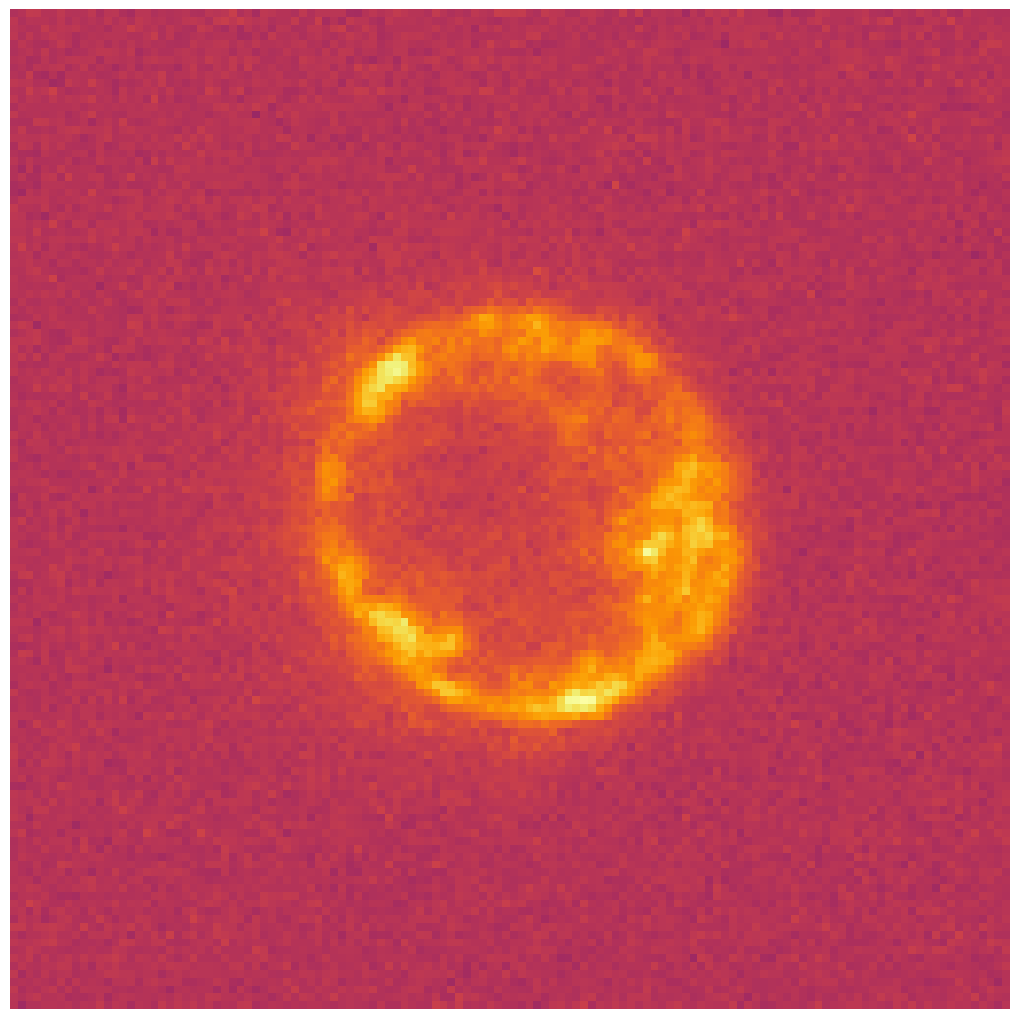

In [12]:
from bsccm import BSCCM
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.animation import FuncAnimation
from matplotlib.cm import inferno
from tqdm import tqdm

np.random.seed(1234)

# Select indices for the maximum grid size you can support
valid_indices = dataset.get_indices()
max_indices = len(valid_indices)
max_grid_size = int(np.sqrt(max_indices))  # Adjust based on the number of available indices
max_grid_size = 20

# Function to create a single frame
def create_frame(frame_num):
    grid_size = min(frame_num + 1, max_grid_size)
    montage = []

    for row in range(grid_size):
        row_images = []
        for col in range(grid_size):
            # Wrap around if the index exceeds the length of grid_indices
            idx = valid_indices[(row * grid_size + col) % max_indices]
            channel = random.choice(channels)
            image = dataset.read_image(idx, channel=channel)

            image_rgb = inferno(image / np.max(image))[:, :, :3]  # Exclude alpha channel
            row_images.append(image_rgb)

        row_images = np.concatenate(row_images, axis=1)
        montage.append(row_images)

    montage = np.concatenate(montage, axis=0)
    im.set_array(montage)

# Set up the figure for animation
fig, ax = plt.subplots(figsize=(10, 10))
# Placeholder for initial image, adjust size as needed
im = ax.imshow(np.zeros((128, 128, 3)), aspect='auto')
ax.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)

# Create and save the animation with tqdm progress bar
def save_animation(anim, filename, fps):
    with tqdm(total=anim.save_count) as pbar:
        def update(*args):
            pbar.update()
        anim.save(filename, writer='imagemagick', fps=fps, progress_callback=update)

anim = FuncAnimation(fig, create_frame, frames=max_grid_size, interval=500)
save_animation(anim, 'cell_montage_animation.gif', 4)


In [3]:

# Select indices for the maximum grid size
valid_indices = dataset.get_indices()
max_indices = len(valid_indices)
max_grid_size = 100  # Maximum grid size

image_size = 128  # Size of each cell's image in the montage

# Function to convert an image to RGB using the inferno colormap (from Version 1)
def to_rgb(image):
    colormap = cm.inferno
    normed_data = (image - np.min(image)) / (np.max(image) - np.min(image))
    mapped_data = colormap(normed_data)
    return (mapped_data[:, :, :3] * 255).astype(np.uint8)

# Function to create a single frame with zoom-out effect
import cv2  # Make sure you have OpenCV installed

def create_frame(frame_num):
    # Calculate current grid size (only odd numbers)
    grid_size = 2 * frame_num - 1
    full_montage_size = max_grid_size * image_size  # The size of the full montage
    single_image_size = full_montage_size // grid_size  # Size of each cell's image in the montage

    montage = np.zeros((full_montage_size, full_montage_size, 3), dtype=np.uint8)

    for row in range(grid_size):
        for col in range(grid_size):
            idx = valid_indices[(row * grid_size + col) % max_indices]
            channel = random.choice(channels)
            image = dataset.read_image(idx, channel=channel)

            # Convert to RGB and resize the image
            rgb_image = to_rgb(image)
            resized_image = cv2.resize(rgb_image, (single_image_size, single_image_size), interpolation=cv2.INTER_NEAREST)


            # Calculate position in montage
            montage_row = row * single_image_size
            montage_col = col * single_image_size

            # Place the resized image in the montage
            montage[montage_row:montage_row + single_image_size, montage_col:montage_col + single_image_size] = resized_image

    return montage



# Set up the figure for animation
fig, ax = plt.subplots(figsize=(10, 10))
# Placeholder for initial image, adjust size as needed
im = ax.imshow(np.zeros((max_grid_size * 128, max_grid_size * 128, 3)), aspect='auto')
ax.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)

# Animation update function
def update(frame_num):
    frame = create_frame(frame_num)
    im.set_array(frame)

# Create the animation
anim = FuncAnimation(fig, update, frames=max_grid_size, interval=500)

# Save the animation with tqdm progress bar
def save_animation(anim, filename, fps):
    with tqdm(total=anim.save_count) as pbar:
        def update_progress(*args):
            pbar.update()
        anim.save(filename, writer='imagemagick', fps=fps, progress_callback=update_progress)

save_animation(anim, 'cell_montage_animation_zoom_out.gif', 1.5)

/var/folders/gp/g6n8kd2x39v3w7vlmqs9j82r0000gn/T/ipykernel_64305/4082791078.py:65: MatplotlibDeprecationWarning: The save_count attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later.
  with tqdm(total=anim.save_count) as pbar:
 94%|█████████▍| 94/100 [21:52<02:40, 26.69s/it]